# Polynomial regression with linear models and neural network
* Are Linear models sufficient for handling processes with transcedental functions?
* Do neural networks perform better in those cases?

### Import libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Global variables for the program

In [75]:
N_points = 500 # Number of points for constructing function
x_min = 1 # Min of the range of x (feature)
x_max = 10 # Max of the range of x (feature)
noise_mean = 0 # Mean of the Gaussian noise adder
noise_sd = 2 # Std.Dev of the Gaussian noise adder
ridge_alpha = tuple([10**(x) for x in range(-3,0,1) ]) # Alpha (regularization strength) of ridge regression
lasso_eps = 0.001
lasso_nalpha=20
lasso_iter=1000
degree_min = 2
degree_max = 8

### Generate feature and output vector following a non-linear function
$$ The\ ground\ truth\ or\ originating\ function\ is\ as\ follows:\  $$

$$ y=f(x)= x^2.sin(x).e^{-0.1x}+\psi(x) $$

$$: \psi(x) = {\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}} $$

In [76]:
x_smooth = np.array(np.linspace(x_min,x_max,501))

In [77]:
# Linearly spaced sample points
X=np.array(np.linspace(x_min,x_max,N_points))

# Samples drawn from uniform random distribution
X_sample = x_min+np.random.rand(N_points)*(x_max-x_min)

In [78]:
def func(x):
    result = (20*x+3*x**2+0.1*x**3)*np.sin(x)*np.exp(-(1/x_max)*x)
    return (result)

In [79]:
noise_x = np.random.normal(loc=noise_mean,scale=noise_sd,size=N_points)

In [80]:
y = func(X)+noise_x
y_sampled = func(X_sample)+noise_x

In [81]:
df = pd.DataFrame(data=X,columns=['X'])
df['Ideal y']=df['X'].apply(func)
df['y']=y
df['X_sampled']=X_sample
df['y_sampled']=y_sampled
df.head()

,X,Ideal y,y,X_sampled,y_sampled
0,1.000000,17.588211,15.650784,3.183910,-4.931815
1,1.018036,18.122428,18.928283,1.616885,35.310703
2,1.036072,18.658563,19.877147,5.834103,-56.593429
3,1.054108,19.196234,20.407360,4.526172,-99.567634
4,1.072144,19.735056,15.576878,8.827200,107.343905


### Plot the function(s), both the ideal characteristic and the observed output (with process and observation noise)

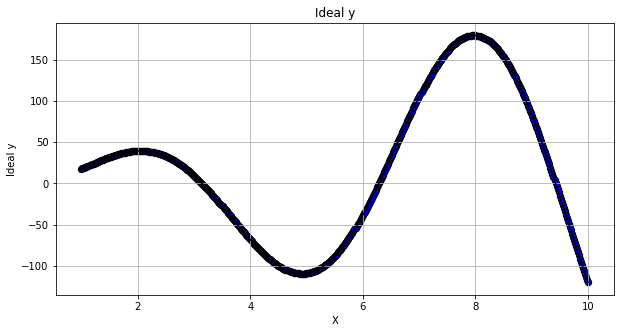

In [82]:
df.plot.scatter('X','Ideal y',title='Ideal y',grid=True,edgecolors=(0,0,0),c='blue',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

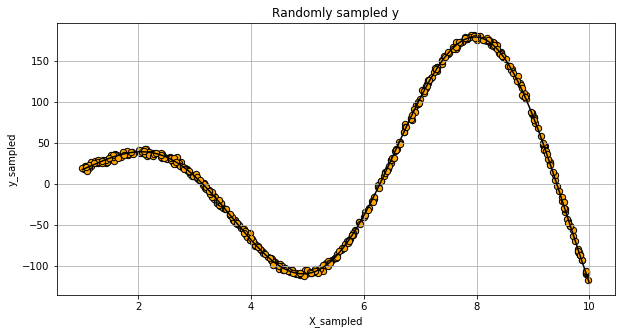

In [83]:
df.plot.scatter('X_sampled',y='y_sampled',title='Randomly sampled y',
                grid=True,edgecolors=(0,0,0),c='orange',s=40,figsize=(10,5))
plt.plot(x_smooth,func(x_smooth),'k')

### Import scikit-learn librares and prepare train/test splits

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [85]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.33)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [86]:
n_train=X_train.shape[0]

### Polynomial model with Ridge regularization (pipelined) with lineary spaced samples
** This is an advanced machine learning method which prevents over-fitting by penalizing high-valued coefficients i.e. keep them bounded **

Test score of model with degree 2: 0.11788061639096882



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 3: 0.4880371335102572



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 4: 0.6690914027641579



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 5: 0.762422405048564



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 6: 0.8219635627413664



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 7: 0.8490620637574158



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 8: 0.8533903011616155



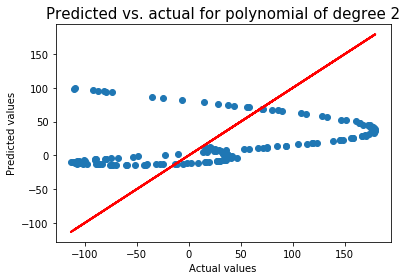

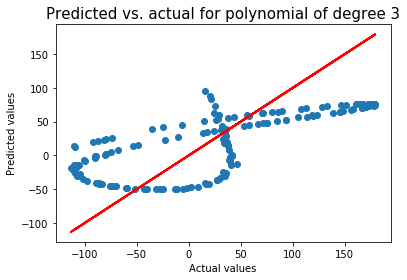

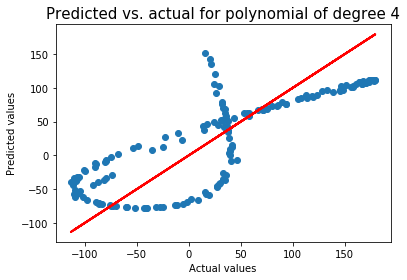

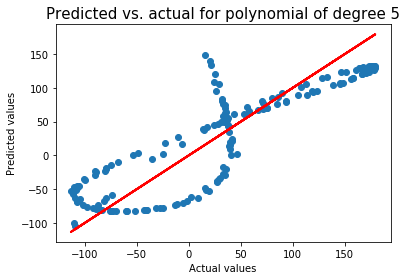

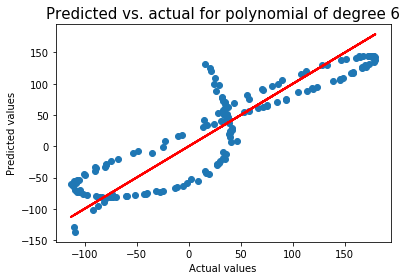

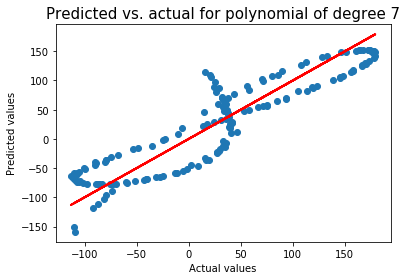

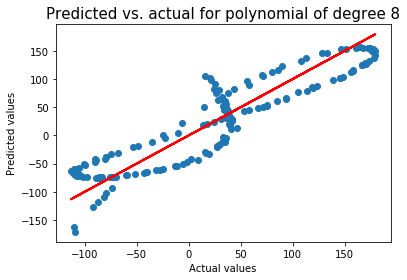

In [87]:
linear_sample_score = []
poly_degree = []
for degree in range(degree_min,degree_max+1):
    #model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,normalize=True,cv=5))
    model = make_pipeline(PolynomialFeatures(degree), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha, 
                                                                  max_iter=lasso_iter,normalize=True,cv=5))
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
    model.fit(X_train, y_train)
    y_pred = np.array(model.predict(X_train))
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(y_pred-y_train)))
    test_score = model.score(X_test,y_test)
    linear_sample_score.append(test_score)
    poly_degree.append(degree)
    print("Test score of model with degree {}: {}\n".format(degree,test_score))
    
    #plt.figure()
    #plt.title("RMSE: {}".format(RMSE),fontsize=10)
    #plt.suptitle("Polynomial of degree {}".format(degree),fontsize=15)
    #plt.xlabel("X training values")
    #plt.ylabel("Fitted and training values")
    #plt.scatter(X_train,y_pred)
    #plt.scatter(X_train,y_train)
    
    plt.figure()
    plt.title("Predicted vs. actual for polynomial of degree {}".format(degree),fontsize=15)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.scatter(y_test,test_pred)
    plt.plot(y_test,y_test,'r',lw=2)

In [88]:
linear_sample_score

[0.11788061639096882,
 0.48803713351025718,
 0.66909140276415791,
 0.76242240504856396,
 0.82196356274136639,
 0.84906206375741577,
 0.85339030116161552]

### Modeling with randomly sampled data set

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df['X_sampled'], df['y_sampled'], test_size=0.33)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

Test score of model with degree 2: 0.1646914433570139



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 3: 0.4733566651449164



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 4: 0.612138190592894



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 5: 0.709418049404799



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 6: 0.7821151062356136



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 7: 0.8223971506912691



C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Test score of model with degree 8: 0.8343946837221697



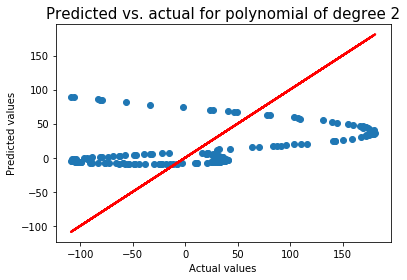

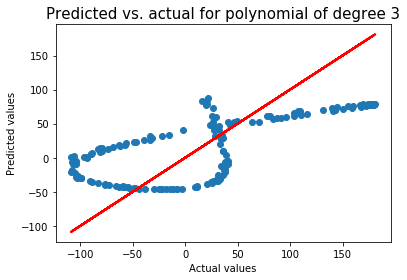

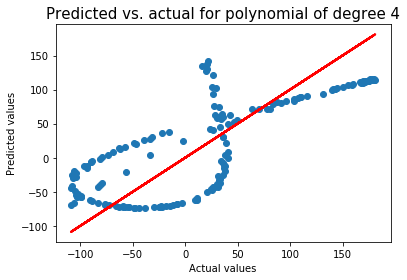

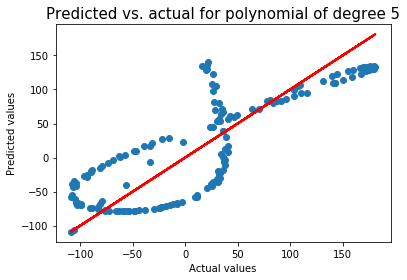

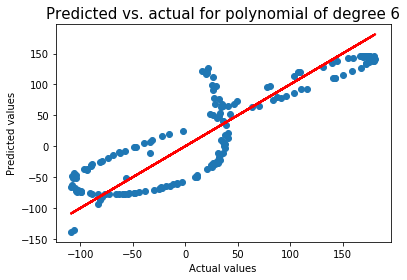

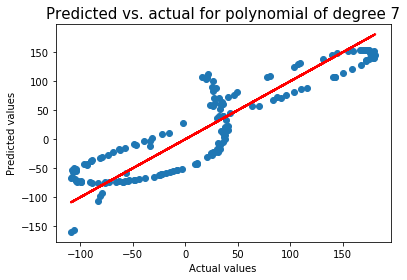

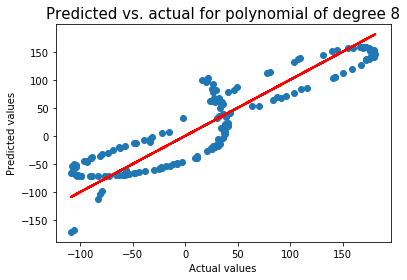

In [90]:
random_sample_score = []
poly_degree = []
for degree in range(degree_min,degree_max+1):
    #model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha,normalize=True,cv=5))
    model = make_pipeline(PolynomialFeatures(degree), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha, 
                                                                  max_iter=lasso_iter,normalize=True,cv=5))
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
    model.fit(X_train, y_train)
    y_pred = np.array(model.predict(X_train))
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(y_pred-y_train)))
    test_score = model.score(X_test,y_test)
    random_sample_score.append(test_score)
    poly_degree.append(degree)
    
    print("Test score of model with degree {}: {}\n".format(degree,test_score))
    
    #plt.figure()
    #plt.title("RMSE: {}".format(RMSE),fontsize=10)
    #plt.suptitle("Polynomial of degree {}".format(degree),fontsize=15)
    #plt.xlabel("X training values")
    #plt.ylabel("Fitted and training values")
    #plt.scatter(X_train,y_pred)
    #plt.scatter(X_train,y_train)
    
    plt.figure()
    plt.title("Predicted vs. actual for polynomial of degree {}".format(degree),fontsize=15)
    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.scatter(y_test,test_pred)
    plt.plot(y_test,y_test,'r',lw=2)

In [91]:
random_sample_score

[0.16469144335701391,
 0.47335666514491642,
 0.61213819059289398,
 0.70941804940479902,
 0.78211510623561364,
 0.82239715069126906,
 0.83439468372216974]

In [92]:
df_score = pd.DataFrame(data={'degree':[d for d in range(degree_min,degree_max+1)],
                              'Linear sample score':linear_sample_score,
                              'Random sample score':random_sample_score})
df_score

,Linear sample score,Random sample score,degree
0,0.117881,0.164691,2
1,0.488037,0.473357,3
2,0.669091,0.612138,4
3,0.762422,0.709418,5
4,0.821964,0.782115,6
5,0.849062,0.822397,7
6,0.853390,0.834395,8


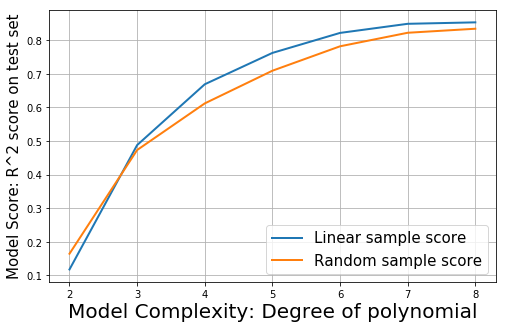

In [93]:
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(df_score['degree'],df_score['Linear sample score'],lw=2)
plt.plot(df_score['degree'],df_score['Random sample score'],lw=2)
plt.xlabel ("Model Complexity: Degree of polynomial",fontsize=20)
plt.ylabel ("Model Score: R^2 score on test set",fontsize=15)
plt.legend(fontsize=15)

#### Cehcking the regularization strength from the cross-validated model pipeline

In [94]:
m=model.steps[1][1]
m.alpha_

0.0014941809717564625

## Neural network for regression

### Import and declaration of variables

In [95]:
import tensorflow as tf

In [96]:
learning_rate = 0.000001
training_epochs = 20000

n_input = 1  # Number of features
n_output = 1  # Regression output is a number only

n_hidden_layer = 35 # layer number of features

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.33)

X_train=X_train.reshape(X_train.size,1)
y_train=y_train.reshape(y_train.size,1)
X_test=X_test.reshape(X_test.size,1)
y_test=y_test.reshape(y_test.size,1)

from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
y_scaled = preprocessing.scale(y_train)

C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
C:\Users\Tirtha\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


### Weights and bias variable

In [99]:
# Store layers weight & bias as Variables classes in dictionaries
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_output]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

In [100]:
print("Shape of the weights tensor of hidden layer:",weights['hidden_layer'].shape)
print("Shape of the weights tensor of output layer:",weights['out'].shape)
print("--------------------------------------------------------")
print("Shape of the bias tensor of hidden layer:",biases['hidden_layer'].shape)
print("Shape of the bias tensor of output layer:",biases['out'].shape)

Shape of the weights tensor of hidden layer: (1, 35)
Shape of the weights tensor of output layer: (35, 1)
--------------------------------------------------------
Shape of the bias tensor of hidden layer: (35,)
Shape of the bias tensor of output layer: (1,)


In [101]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    w=sess.run(weights['hidden_layer'])
    b=sess.run(biases['hidden_layer'])
print("Weight tensor initialized randomly\n---------------------------------------\n",w)
print("Bias tensor initialized randomly\n---------------------------------------\n",b)
sess.close()

Weight tensor initialized randomly
---------------------------------------
 [[ 1.04348898 -0.62562287  0.0830955  -0.2694059  -1.59905183  1.82611179
  -0.21245536 -1.21637654  0.97147286 -0.08349181 -1.6938988   0.7615844
   1.4193033   1.52271056 -0.26382461 -0.66391391  0.62335193 -0.64882958
   0.34043887  0.51017839 -1.31694865 -0.38064736  1.18706989  0.3256394
  -1.07438827  0.99597555 -0.84235168 -0.14966556 -0.07332329  0.45747992
  -0.90638632  0.38841721 -1.22614443 -1.21204579 -2.03451443]]
Bias tensor initialized randomly
---------------------------------------
 [ 0.42340374  0.19241172 -0.32600278  0.70526534  0.61445254  0.15266864
  0.51332366  1.05123603  0.49825382  0.58842802  1.42681241  0.90139294
  0.25430983  0.70529252 -0.16479528  1.69503176  0.94038701  0.32357663
  0.61296964 -0.77653986  0.07061771  1.3192941   0.12997486  0.4277775
  0.37885833  1.02218032  0.81157911  0.29033285  0.521981    0.20968065
 -0.46419618  0.01151479 -0.11108538 -0.60381615  0.17

### Input data as placeholder

In [102]:
# tf Graph input
x = tf.placeholder("float32", [None,n_input])
y = tf.placeholder("float32", [None,n_output])

### Hidden and output layers definition (using TensorFlow mathematical functions)

In [103]:
# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x, weights['hidden_layer']),biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)

# Output layer with linear activation
ops = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

### Gradient descent optimizer for training (backpropagation):
For the training of the neural network we need to perform __backpropagation__ i.e. propagate the errors, calculated by this cost function, backwards through the layers all the way up to the input weights and bias in order to adjust them accordingly (minimize the error). This involves taking first-order derivatives of the activation functions and applying chain-rule to ___'multiply'___ the effect of various layers as the error propagates back.

You can read more on this here: [Backpropagation in Neural Network](https://en.wikipedia.org/wiki/Backpropagation)

Fortunately, TensorFlow already implicitly implements this step i.e. takes care of all the chained differentiations for us. All we need to do is to specify an Optimizer object and pass on the cost function. Here, we are using a Gradient Descent Optimizer.

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point.

You can read more on this: [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

In [104]:
# Define loss and optimizer
cost = tf.reduce_sum(tf.squared_difference(ops,y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### TensorFlow Session for training and loss estimation

In [105]:
from tqdm import tqdm

# Initializing the variables
init = tf.global_variables_initializer()

# Empty lists for book-keeping purpose
epoch=0
log_epoch = []
epoch_count=[]
acc=[]
loss_epoch=[]

# Launch the graph
with tf.Session() as sess:
    sess.run(init)    
    # Loop over epochs
    for epoch in tqdm(range(training_epochs)):
        # Run optimization process (backprop) and cost function (to get loss value)
        _,l=sess.run([optimizer,cost], feed_dict={x: X_scaled, y: y_scaled})
        loss_epoch.append(l) # Save the loss for every epoch        
        epoch_count.append(epoch+1) #Save the epoch count
       
        # print("Epoch {}/{} finished. Loss: {}, Accuracy: {}".format(epoch+1,training_epochs,round(l,4),round(accu,4)))
        #print("Epoch {}/{} finished. Loss: {}".format(epoch+1,training_epochs,round(l,4)))
    w=sess.run(weights)
    b = sess.run(biases)
    #layer_1 = tf.add(tf.matmul(X_test, w['hidden_layer']),b['hidden_layer'])
    #layer_1 = tf.nn.relu(layer_1)

    # Output layer with no activation
    #ops = tf.add(tf.matmul(layer_1, w['out']), b['out'])

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:21<00:00, 942.58it/s]


In [106]:
layer1=np.matmul(X_test,w['hidden_layer'])+b['hidden_layer']
layer1_out = np.maximum(layer1,0)
yhat = np.matmul(layer1_out,w['out'])+b['out']

In [107]:
yhat-y_test

array([[ -37.49936961],
       [ -39.97013604],
       [ -34.01359997],
       [ -43.91127032],
       [-184.78185437],
       [  -4.66512046],
       [  38.72922959],
       [ -78.58630366],
       [  64.02636283],
       [-100.7032588 ],
       [  75.53991046],
       [  19.71153007],
       [  35.80187964],
       [  45.6526769 ],
       [ 105.64461927],
       [-181.91431329],
       [-189.48488565],
       [-106.03340244],
       [-125.56517564],
       [ -38.58670244],
       [ -23.52326353],
       [  53.91068759],
       [  24.95932026],
       [ -31.72555378],
       [  -3.68322205],
       [  73.89759668],
       [  47.14932393],
       [  -3.9792645 ],
       [  29.89713812],
       [-179.49085381],
       [-174.41913828],
       [ -48.82659071],
       [-182.35481012],
       [  45.45777845],
       [  -8.35487521],
       [  95.08366707],
       [  99.25342108],
       [  67.10883198],
       [  79.38829482],
       [  39.5211417 ],
       [ -35.62356312],
       [-158.055

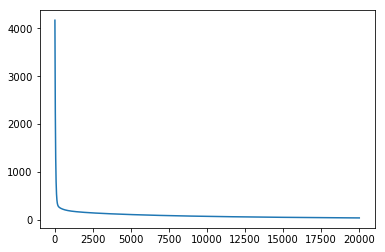

In [108]:
plt.plot(epoch_count,loss_epoch)

## Keras

In [109]:
X_scaled.shape

(335, 1)

In [110]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(25, activation='linear', input_dim=1))
#model.add(Dropout(.2))
model.add(Dense(25, activation='linear'))
#model.add(Dropout(.1))
model.add(Dense(25, activation='linear'))
model.add(Dense(25, activation='linear'))
model.add(Dense(1, activation='linear'))

# Compiling the model
sgd = SGD(lr=0.001, decay=0, momentum=0.9, nesterov=True)
model.compile(loss = 'mean_squared_error', optimizer='sgd')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 25)                50        
_________________________________________________________________
dense_47 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_48 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_49 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 26        
Total params: 2,026
Trainable params: 2,026
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.fit(X_scaled, y_scaled, epochs=2000, verbose=0)

In [112]:
score = model.evaluate(X_test, y_test)
score

165/165 [==============================] - ETA:  - 0s 608us/step


8059.3590613162878

In [113]:
yhat=model.predict(X_test)

In [114]:
yhat

array([[ 0.54251289],
       [ 0.58316928],
       [ 1.8282721 ],
       [ 0.55775893],
       [ 2.30090284],
       [ 1.77236915],
       [ 1.68089247],
       [ 1.90958452],
       [ 1.630072  ],
       [ 1.95024085],
       [ 1.18793333],
       [ 0.96940523],
       [ 1.69105649],
       [ 1.66564631],
       [ 1.3810513 ],
       [ 2.316149  ],
       [ 2.26024628],
       [ 2.52451277],
       [ 2.01630783],
       [ 0.5374307 ],
       [ 0.35955897],
       [ 1.09137428],
       [ 2.70238471],
       [ 0.73054874],
       [ 2.6718924 ],
       [ 1.57925129],
       [ 1.66056406],
       [ 0.88809222],
       [ 1.69613886],
       [ 2.17385149],
       [ 2.14844108],
       [ 1.85368228],
       [ 2.32631278],
       [ 2.73287702],
       [ 2.66681027],
       [ 1.26416421],
       [ 1.30482054],
       [ 1.13711286],
       [ 1.19301534],
       [ 1.04563594],
       [ 0.49677432],
       [ 2.08745694],
       [ 1.50810266],
       [ 1.47761059],
       [ 1.41662574],
       [ 2

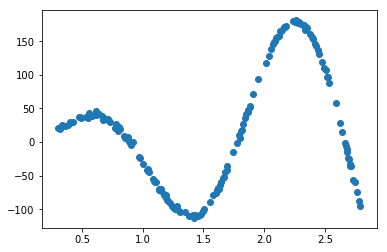

In [115]:
plt.scatter(yhat,y_test)